In [2]:
import jsonpickle

import matplotlib.pyplot as plt
import os

Text(0.5, 1.0, 'Average Game Length over Time')

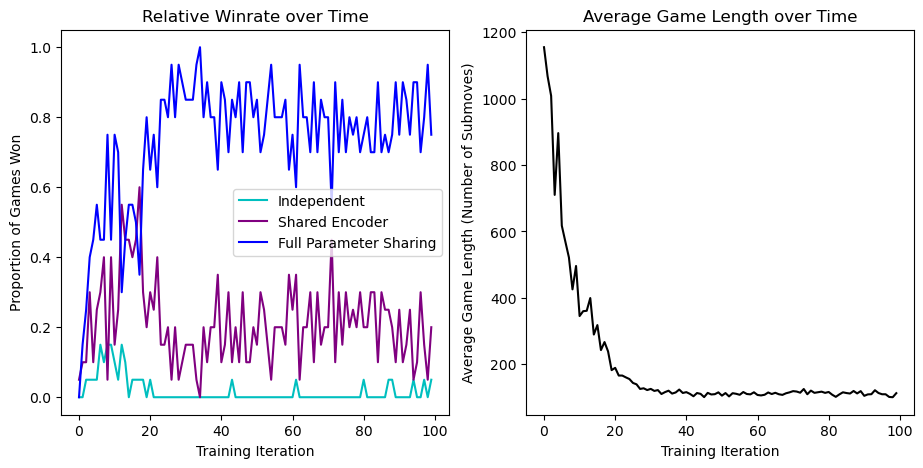

In [6]:
with open('data/random_self_matches.json', 'r') as f:
    s = jsonpickle.decode(f.read())
    # convert json string to python list of dictionaries
    results = jsonpickle.decode(s)

# game_lengths = []
# for result in results:
#     if result["eval_average_moves"]:
#         game_lengths.append(result["eval_average_moves"])
#     else:
#         game_lengths.append(0)

independent = "independent_n2"
shared_encoder = "shared_encoder_n2"
fully_shared = "full_sharing_n2"
trunc = "truncated"

num_iters = 100

winrates_over_time = {independent: [0] * num_iters, shared_encoder: [0] * num_iters, fully_shared: [0] * num_iters, trunc: [0] * num_iters}
avg_game_lengths = [0] * num_iters
for i, result_list in enumerate(results.values()):
    for j in range(20):
        try:
            result = result_list[j]
            for k in range(6):
                pol = result["players"][f"{k}"]
                winrates_over_time[pol][i] += result["eval_win_rates"][f"player_{k}"] / 20
            winrates_over_time[trunc][i] += result["eval_win_rates"]["truncated"] / 20
            avg_game_lengths[i] += (result["eval_game_lengths"][0]) / 20
        except IndexError:
            pass


m = {independent: "Independent", shared_encoder: "Shared Encoder", fully_shared: "Full Parameter Sharing"}
# fig, ax1 = plt.subplots()
# # on the same plot, add another vertical axis
# ax1.plot(avg_game_lengths, 'black', label='Avg Game Length', linestyle='--', alpha=0.5)
# ax1.set_xlabel("Iteration")
# ax1.set_ylabel("Game Length")

# ax2 = ax1.twinx()
# for player in winrates_over_time:
#     plt.plot(winrates_over_time[player], label=player)

# ax2.set_ylabel("Proportion of Games Won")
# ax2.legend()

# separate plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

colors = {
    independent: 'c',
    shared_encoder: 'purple',
    fully_shared: 'b',
    trunc: 'black'
}

for player in winrates_over_time:
    if player != trunc:
        ax1.plot(winrates_over_time[player], label=m[player], color=colors[player])

ax2.plot(avg_game_lengths, 'black')


ax1.set_xlabel("Training Iteration")
ax1.set_ylabel("Proportion of Games Won")
ax1.set_title("Relative Winrate over Time")

ax1.legend()

# move legend off plot
# ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax2.set_xlabel("Training Iteration")
ax2.set_ylabel("Average Game Length (Number of Submoves)")

ax2.set_title("Average Game Length over Time")


# display side-by-side
